# Imports

In [4]:
%pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# %pip install -q -r requirements.txt

## Lib imports

In [2]:
import matplotlib.pyplot as plt
from icecream import ic
import seaborn as sns
import pandas as pd

# import datetime
import os

## Methods imports

In [5]:
from main_methods import (
    get_pdf_info,
    extract_and_measure_timing,
)

## PDF Extraction Methods
from extraction_methods.pymupdf4llm import get_pymupdf4llm
from extraction_methods.unstructured import (
    get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    get_unstructured_ocr,
)

e:\_C0D3\_RepoS\_Perso\__DataForGood\2025 02 - Parse research PDFs\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Functions

## OS and other tools

In [6]:
def get_path_of_all_files_in_subfolders_with_extension_in_list(
    folder_path: str, extensions: list[str], ignore_folders: list[str] = []
) -> list:
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        # print('root', root)
        # print('dirs', dirs)
        # print('files', files)
        if any([(os.sep + ignore_folder) in root for ignore_folder in ignore_folders]):
            continue
        # if root.__contains__(r"\outputs"):
        #     continue

        for file in files:
            for extension in extensions:
                if file.lower().endswith(extension) and not file.startswith("."):
                    all_files.append(os.path.join(root, file))
    return all_files


# Main run

In [8]:
pdf_list = get_path_of_all_files_in_subfolders_with_extension_in_list(
    "sources_pdf", [".pdf"], ["outputs"]
)
print(f"Found {len(pdf_list)} pdf files")

Found 62 pdf files


In [9]:
# Create a dataframe to store the data and timing of processing the pdf files
df_pdf_processing = pd.DataFrame(
    columns=[
        "pdf_path",
        "pages_length",
        "file_size",
        "method",
        "output_md",
        "time_processing",
    ]
)

In [10]:
### Define methods list to be used
methods_list = [
    get_pymupdf4llm,
    get_unstructured_auto,
    get_unstructured_fast,
    get_unstructured_hires,
    get_unstructured_ocr,
]

In [ ]:
for pdf_path in pdf_list[:3]:
    # "pdf_name": os.path.basename(pdf_path),
    print(f"Processing {pdf_path}")
    file_info = get_pdf_info(pdf_path)
    file_length = file_info["pages"]

    file_size = os.path.getsize(pdf_path) / 1024 / 1024

    for method in methods_list:
        # Extract and measure the time of the method
        output = extract_and_measure_timing(
            method,
            pdf_path=pdf_path,
            # bool_write_images=False,
            # bool_embed_images=False,
        )
        # Append the data to the dataframe
        df_pdf_processing.loc[len(df_pdf_processing)] = [
            pdf_path,
            file_length,
            file_size,
            method.__name__,
            output[0],
            output[1],
        ]


Processing sources_pdf\Documentation Ecoskills RH\etude-transition-écologique Secteur du commerce (pas RH).pdf
lol-get_pymupdf4llm


In [ ]:
df_pdf_processing

,pdf_path,pages_length,file_size,method,output_md,time_processing
0,1_Base articles\Documentation Ecoskills RH\etu...,103,14.742152,get_1_pymupdf4llm,"[{'metadata': {'format': 'PDF 1.5', 'title': '...",32.486764
1,1_Base articles\Documentation Ecoskills RH\Lit...,22,0.219145,get_1_pymupdf4llm,"[{'metadata': {'format': 'PDF 1.6', 'title': '...",3.409501


## TODO : Store the output of each methods

In [ ]:
## TODO

## Plot the timing of each methods

<Axes: xlabel='file_size', ylabel='time_processing'>

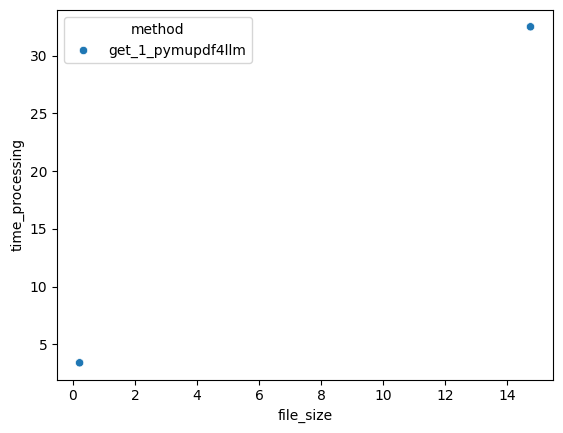

In [ ]:
# Print a graph, with file_size on the x-axis and time taken to process the pdf on the y-axis, spliting the data in series by the method used to process the pdf (1, 2, ...)
sns.scatterplot(
    data=df_pdf_processing, x="file_size", y="time_processing", hue="method"
)
plt.show()

# Content Analysis

In [ ]:
##TODO